# Regression 
 - 모두를 위한 Machine Learning과 겹치지만 그래프까지 표현

In [9]:
import tensorflow as tf

In [15]:
%pylab
%matplotlib inline
%load_ext watermark
%watermark -v -m -p numpy,tensorflow

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.5.1
IPython 5.1.0

numpy 1.11.2
tensorflow 0.9.0

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.1.19-v7+
machine    : armv7l
processor  : armv7l
CPU cores  : 4
interpreter: 32bit


/usr/local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['step']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


1000개의 데이터 포인트를 만듭니다. x1은 평균값을 0으로 갖고 표준편차가 0.55인 정규분포를 생성합니다. <br> 
y1은 x1의 데이터를 이용해 기울기는 0.1, y 절편은 0.3인 방정식을 이용해 만듭니다. <br>
이때 y 절편에 평균값 0, 표준편차 0.03인 정규분포를 하여 포인트를 방정식이 만드는 직선의 y축 방향으로 흩어지게 만듭니다.

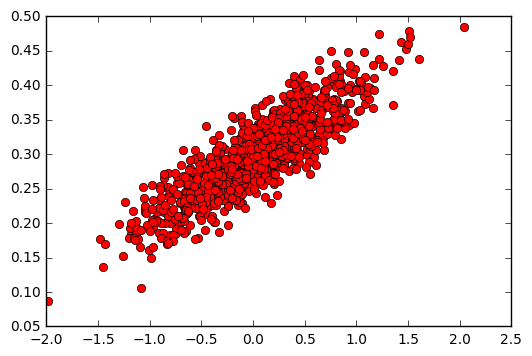

In [11]:
num_points = 1000
vectors_set = []
for i in range(num_points):
         x1 = np.random.normal(0.0, 0.55)
         y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
         vectors_set.append([x1, y1])
        
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.plot(x_data, y_data, 'ro')

-1~1 사이의 랜덤한 균등분포 값으로 1차원 엘리먼트가 한개인 가중치 텐서를 만듭니다. 바이어스 텐서는 0으로 초기화된 엘리먼트를 갖는 1차원 텐서입니다.

In [12]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

loss 함수를 정의하고 최적화 방법은 $Learning\ rage$ 0.5인 $Gradient \ decent$를 사용합니다.

In [13]:
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)


init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

0 [-0.36668798] [ 0.31196588] 0.063829


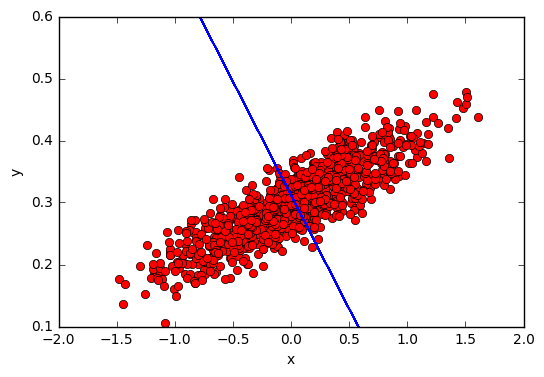

1 [-0.23072737] [ 0.30779788] 0.0322616


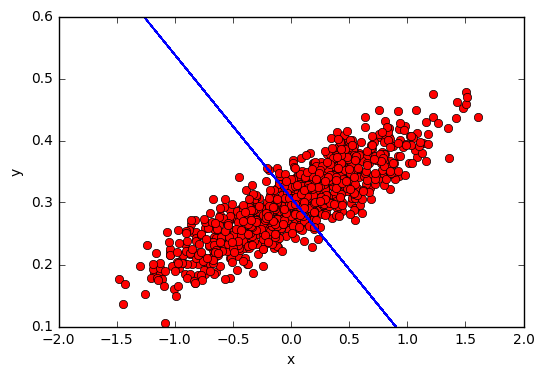

2 [-0.13472173] [ 0.30499032] 0.0165229


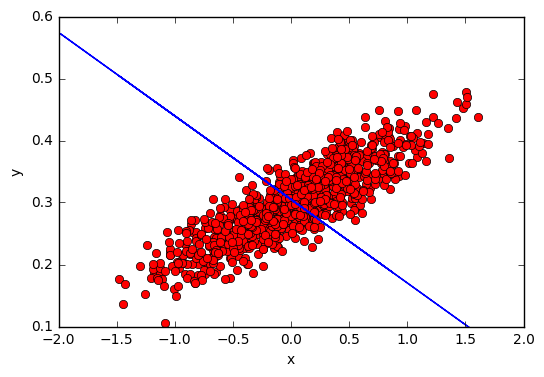

3 [-0.06693226] [ 0.30300787] 0.00867595


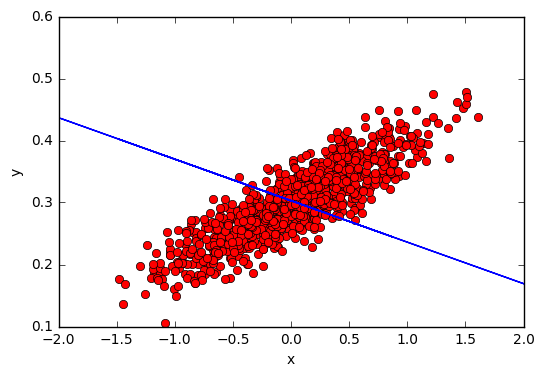

4 [-0.0190662] [ 0.30160803] 0.00476366


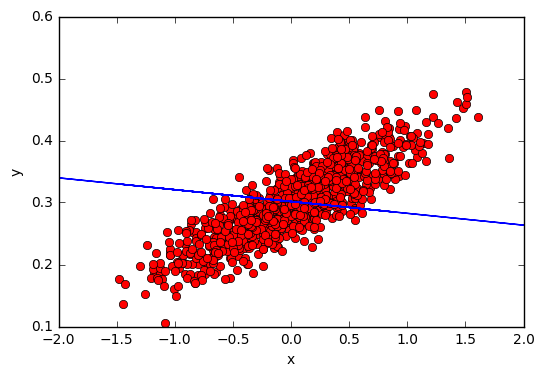

5 [ 0.01473197] [ 0.30061963] 0.00281309


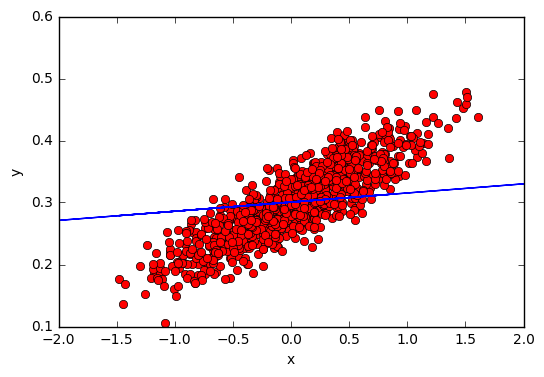

6 [ 0.03859682] [ 0.29992172] 0.00184058


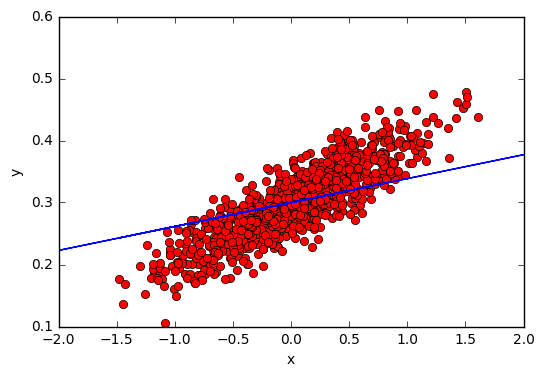

7 [ 0.05544776] [ 0.29942891] 0.00135571


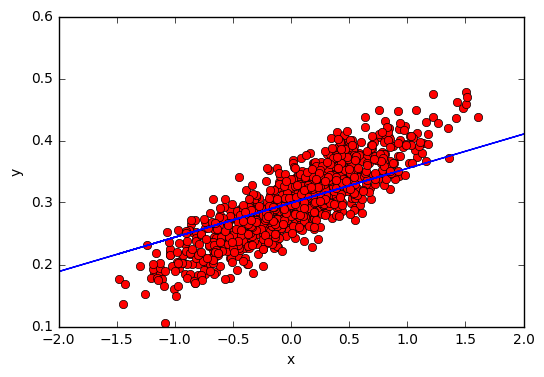

In [14]:
for step in range(8):
    sess.run(train)
    print(step, sess.run(W), sess.run(b), sess.run(loss))
    # 산포도 그리기
    plt.plot(x_data, y_data, 'ro')
    # 직선 그리기
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    # x, y 축 레이블링을 하고 각 축의 최대, 최소값 범위를 지정합니다.
    plt.xlabel('x')
    plt.xlim(-2,2)
    plt.ylim(0.1,0.6)
    plt.ylabel('y')
    plt.show()